## Probability density estimation

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal
from scipy.stats import norm
import seaborn as sns
from sklearn.neighbors import KernelDensity

*Generate sample data using normal distribution*

In [25]:
sample = normal(loc = 50, scale = 5, size = 1000)  #here the population mean = 50 and pop sd = 5

In [26]:
# we can see that the sample mean is not exactly 50
sample.mean()

50.148325648179686

*Plot a histogram to understand the distribution*

(array([  9.,  27.,  91., 189., 221., 233., 137.,  64.,  25.,   4.]),
 array([36.19982727, 39.0801334 , 41.96043953, 44.84074566, 47.72105179,
        50.60135792, 53.48166405, 56.36197018, 59.24227631, 62.12258244,
        65.00288857]),
 <BarContainer object of 10 artists>)

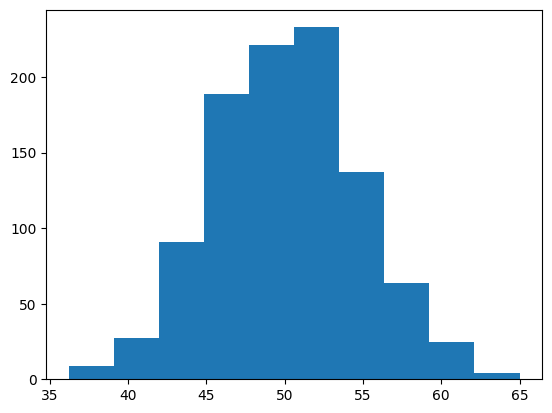

In [27]:
plt.hist(sample, bins = 10) 

*Calculate sample mean and sample standard deviation*

In [28]:
sample_mean = sample.mean()
sample_std = sample.std()

*Now we can fit the distribution by using mean and std*
![pdf of normal](https://www.investopedia.com/thmb/vEnFyFaX2zK96wVerxokPmEt3dU=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/Clipboard01-fdb217713438416cadafc48a1e4e5ee4.jpg)

In [29]:
dist = norm(sample_mean, sample_std)

*Generate 100 data points between the minimum and maximum value*

In [30]:
values = np.linspace(sample.min(), sample.max(), 100)

*Calculating the probability density for every value x*

In [31]:
prob = [dist.pdf(value) for value in values]

*Now we can plot a histogramn and pdf*

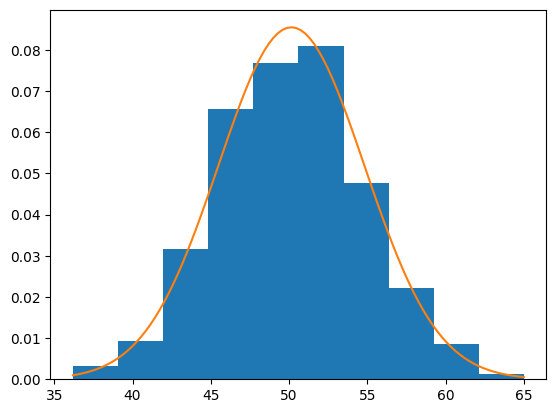

In [32]:
plt.hist(sample, bins = 10, density = True)
plt.plot(values, prob)

*Alternate way using seaborn*

<Axes: ylabel='Count'>

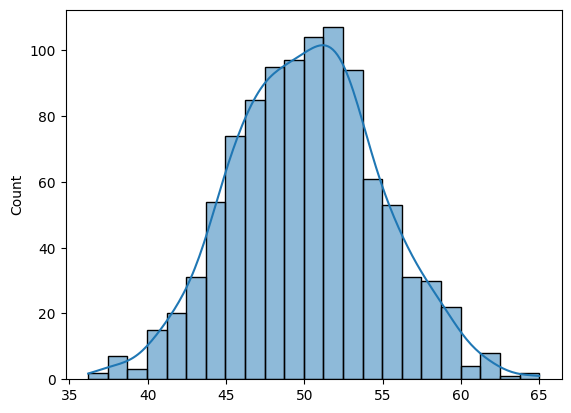

In [33]:
sns.histplot(sample, kde = True)

## Kernel Density Estimation (KDE)

*Generating a sample of 1000 points*

In [35]:
sample1 = normal(loc = 20, scale = 5, size = 300)
sample2 = normal(loc = 40, scale = 5, size = 700)
sample = np.hstack((sample1, sample2))

*Plotting a histogoram*

(array([ 2.,  1.,  5.,  4.,  4.,  6., 16., 13., 17., 20., 25., 24., 22.,
        21., 20., 18., 22., 18., 18., 10., 12., 11., 10., 18., 17., 29.,
        35., 52., 61., 54., 57., 46., 58., 55., 44., 42., 31., 23., 19.,
        18.,  6.,  6.,  6.,  2.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([ 6.18045178,  7.26279134,  8.34513089,  9.42747045, 10.50981   ,
        11.59214956, 12.67448912, 13.75682867, 14.83916823, 15.92150779,
        17.00384734, 18.0861869 , 19.16852646, 20.25086601, 21.33320557,
        22.41554513, 23.49788468, 24.58022424, 25.6625638 , 26.74490335,
        27.82724291, 28.90958247, 29.99192202, 31.07426158, 32.15660114,
        33.23894069, 34.32128025, 35.40361981, 36.48595936, 37.56829892,
        38.65063848, 39.73297803, 40.81531759, 41.89765715, 42.9799967 ,
        44.06233626, 45.14467582, 46.22701537, 47.30935493, 48.39169449,
        49.47403404, 50.5563736 , 51.63871316, 52.72105271, 53.80339227,
        54.88573183, 55.96807138, 57.05041094, 58.1327505 ,

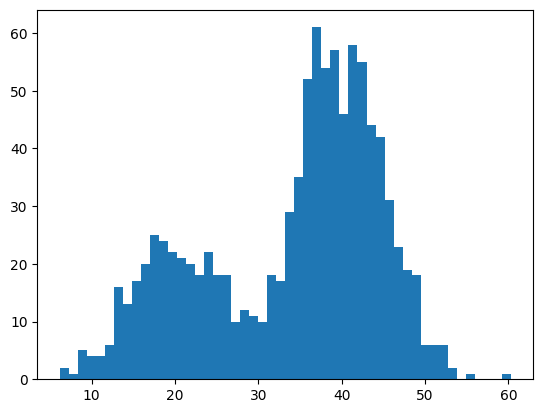

In [37]:
plt.hist(sample, bins = 50)

**The graph doesn't follow any particular known distribution**

In [39]:
model = KernelDensity(bandwidth= 3, kernel= 'gaussian')

# We need to convert the data to 2D because ML algo work on 2D data

sample = sample.reshape(len(sample), 1)
model.fit(sample)  #basically the model has calculated the Y values

KernelDensity(bandwidth=3)

*Generate 100 data points between the min and max sample value*

In [40]:
values = np.linspace(sample.min(), sample.max(), 100)
values = values.reshape(len(values), 1)

*Calculating the probabilites of the "values"*

In [41]:
prob = model.score_samples(values)
prob = np.exp(prob)  

***Note:*** *`score_scamples()` returns the log-density estimate of the input sample values. This is because the score_samples() method of the KernelDensity class return the logarithm of the probability density estimate rather than the actual probability densoty estimate. So we need to find the exponentional values*

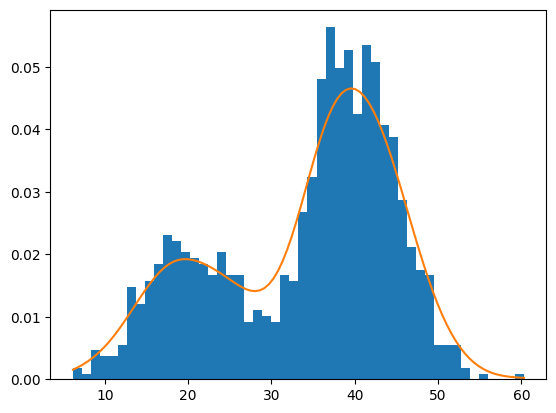

In [42]:
plt.hist(sample, bins = 50, density = True)
plt.plot(values[:], prob)
plt.show()